In [2]:
import pandas as pd
from pycaret.classification import *

In [31]:
train = pd.read_csv('./Data/titanic_filer_train.csv')
test = pd.read_csv('./Data/titanic_test.csv')

train.shape, test.shape

((891, 9), (418, 11))

In [32]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [39]:
classification_setup = setup(data= train, target='Survived',remove_outliers=True,normalize=True,normalize_method='minmax')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2641
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 9)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [40]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.812500,0.000000,0.714000,0.773400,0.741100,0.594700
1,Linear Discriminant Analysis,0.809100,0.829000,0.714000,0.766600,0.737900,0.588300
2,Gradient Boosting Classifier,0.807500,0.830400,0.687900,0.788300,0.731600,0.582900
3,Logistic Regression,0.805800,0.830400,0.700800,0.766800,0.730900,0.579700
4,Light Gradient Boosting Machine,0.800700,0.826200,0.661300,0.788200,0.715500,0.564400
5,CatBoost Classifier,0.797300,0.830400,0.665800,0.775000,0.713300,0.558400
6,Ada Boost Classifier,0.793900,0.826600,0.714200,0.741000,0.724400,0.560300
7,K Neighbors Classifier,0.790500,0.820800,0.678100,0.751600,0.708800,0.546500
8,Extreme Gradient Boosting,0.782200,0.809600,0.665600,0.746400,0.700100,0.530300
9,Random Forest Classifier,0.770300,0.808300,0.633800,0.735400,0.677300,0.500700


In [46]:
gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8167,0.8725,0.6957,0.8000,0.7442,0.6024
1,0.7500,0.7691,0.5652,0.7222,0.6341,0.4485
2,0.8136,0.8139,0.7727,0.7391,0.7556,0.6050
3,0.6949,0.7138,0.6818,0.5769,0.6250,0.3709
4,0.8136,0.8882,0.6818,0.7895,0.7317,0.5900
5,0.8305,0.8182,0.6818,0.8333,0.7500,0.6237
6,0.8305,0.8452,0.7273,0.8000,0.7619,0.6308
7,0.8644,0.8943,0.6818,0.9375,0.7895,0.6931
8,0.8983,0.9203,0.7826,0.9474,0.8571,0.7793
9,0.7627,0.7681,0.6087,0.7368,0.6667,0.4850


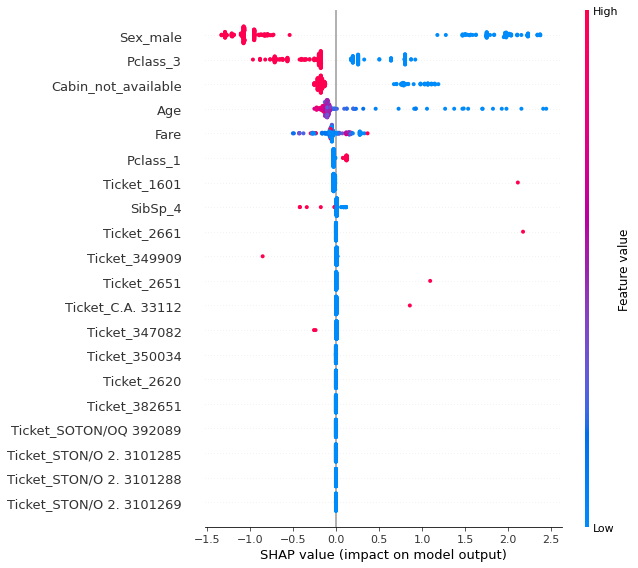

In [37]:
interpret_model()

In [22]:
pred = predict_model(gb, data = test)

In [23]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred.Label})
output.to_csv('titanic2submission.csv', index=False)